# Introduction
### Goal:  Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

For this project we must create a data set by simulating a real-world phenomenon of your choosing. After examining available datasets such as petrol prices and other economic factors (I found these to have too many variables and possibly be difficult to synthesise this kind of data). So I looked at weather data, as everyone in Ireland has an interest in weather and the data was available. To model one element of this data I choose rain fall data, as it is reasonably simplistic but there is lots of it and it is spread across multiple collection points. So while rainfall data is the data - we could examine it through rainfall across 4-5 different sites and create synthetic data for a sythetic site possibly or create synthetic data for exisintg sites based on previous data.
 Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.

In [1]:
import pandas as pd
import matplotlib as plt

# read the dat from a csv file into a pandas dataframe
# the data is monthly rainfall totals for Irish weather stations
# since 1958 to 2015
# I have come across this dataset previously. 
df = pd.read_csv('data/totalrainfall.csv')

# convert the date column to datetime format to use datetime functions
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

# set this column as the dataframe index and del the original date column
df.index=df.date
del df['date']

# display the first few rows
df.head()
#df.describe()

,Belmullet,Birr,Cahirciveen,Casement,Claremorris,Clones,Cork airport,Dublin airport,Galway,Kilkenny,Malin head,Mullingar,Roches Point,Rosslare,Shannon airport
date,,,,,,,,,,,,,,,
1958-01-01,160.2,95.6,214.8,..,146.9,104.8,..,40.0,..,116.4,127.2,109.4,120.7,102.5,115.6
1958-02-01,75.2,85.6,130.8,..,98.3,97.1,..,101.6,..,87.6,143.2,82.0,107.1,119.7,92.8
1958-03-01,86.4,40.9,133.5,..,82.3,33,..,23.4,..,33.9,45.6,34.1,133.8,68.4,52.0
1958-04-01,30.6,37.5,40.6,..,37.4,30.4,..,29.9,..,28,52.3,25.7,13.3,18.1,30.2
1958-05-01,118.0,101.2,123.1,..,126.7,73,..,103.9,..,91.9,69.0,86.6,130.6,113,97.6


Some of the sites have missing data so then I will exmaine them ones that have complete data. The mean calculations below ignore any columns with missing data in the csv file. So I end up with 6 weather stations that have an average for the full dataset - which leads to 687 data points for each station. 

In [2]:
monthly_samples = 687/12
print(monthly_samples)


57.25


In [3]:
# create new column containing the month from the index
df['month'] = df.index.month
# new dataframe grouping each column by month and displaying the mean for that month
by_month = df.groupby('month').mean()
by_month

,Belmullet,Cahirciveen,Dublin airport,Malin head,Mullingar,Shannon airport
month,,,,,,
1,128.789655,173.136207,65.629310,115.946552,92.898276,99.913793
2,88.834483,125.805172,51.232759,84.362069,68.998276,75.381034
3,90.820690,118.043103,51.874138,81.218966,68.453448,70.294828
4,66.985965,90.757895,52.135088,62.545614,64.868421,59.508772
5,73.161404,92.321053,58.787719,60.721053,69.771930,64.238596
6,71.154386,89.066667,61.996491,69.891228,71.270175,67.326316
7,73.838596,93.582456,57.666667,77.907018,72.410526,65.464912
8,94.833333,107.459649,71.915789,89.778947,81.173684,81.349123
9,102.701754,123.312281,66.207018,96.529825,81.612281,79.107018


# Mean

Naively then I thought looking at monthly means over time might be an interesting method to examine the data so I took Belmullet as an example. This makes the data to sparse and something I should have thought of was I was removing granularity too early and I should look at the whole dataset then look at mean.

In [4]:
belmulletMean = by_month['Belmullet']
plt = belmulletMean.hist(bins=12)
plt.plot()



[]

[]

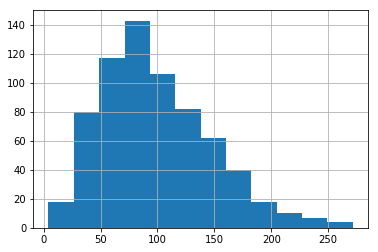

In [12]:
belmullet = df["Belmullet"]
mean = 98.960990
standarddeviation = 48.264524
plt = belmullet.hist(bins=12)
plt.plot()




In [6]:
belmullet.describe()

count    687.000000
mean      98.960990
std       48.264524
min        4.200000
25%       63.650000
50%       90.900000
75%      127.450000
max      271.600000
Name: Belmullet, dtype: float64

Next we examine the plot of its distribution, here I choose the quantile-quantile plot for checking the distribution of the data sample.

Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution

[]

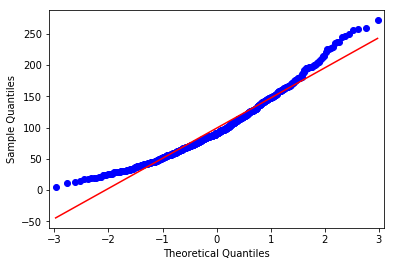

In [7]:
from statsmodels.graphics.gofplots import qqplot
qqplot(belmullet, line='s')
plt.plot()